### Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Path of dataset

In [ ]:
train_data_path = '/content/gdrive/MyDrive/Dataset/Gurumukhi/train/'
val_data_path = '/content/gdrive/MyDrive/Dataset/Gurumukhi/val/'

### Import Required Library

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dataset
# import torch.utils.data.DataLoader as DataLoader
import matplotlib.pyplot as plt

### Device Config

In [ ]:
# device config
device = ("cuda" if torch.cuda.is_available() else "cpu")
# print(device)

### Hyperparameters Define

In [ ]:
# Hyper parameters define
batch_size = 100
input_size = 3*32*32 # Image pixel value 3*32*32
hidden_size = 100
output_size = 10 # Number of classes of an images
learning_rate = 0.01
tuner = 0.2 # Used for Regularization
num_epoch = 10

### Composed Transform

In [ ]:
# transform = transforms.Compose(
#     [transforms.ToTensor(),
#      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

transform = transforms.Compose([
                    # transforms.CenterCrop(224),
                    transforms.ToTensor()])

### Dataset and Dataloader

In [ ]:
from torch.utils.data import DataLoader
train_dataset = torchvision.datasets.ImageFolder(root=train_data_path, transform=transform)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size)

val_dataset = torchvision.datasets.ImageFolder(root=val_data_path, transform=transform)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size)

## Verify Dataloading

torch.Size([100, 3, 32, 32]) torch.Size([100])
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)


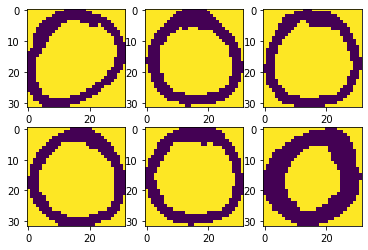

In [ ]:
example = iter(train_loader)
sample, label = next(example)
print(example)
print(sample.shape, label.shape)

for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.imshow(sample[i][0])
  print(label[i])

plt.show()



# def imshow(img):
#     img = img / 2 + 0.5  # unnormalize
#     plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image
    
    
# dataiter = train_loader.__iter__()
# images, labels = dataiter.__next__()
# images = images.numpy() # convert images to numpy for display# plot the images in the batch, along with the corresponding labels
# fig = plt.figure(figsize=(25, 4))
# # display 20 images
# for idx in np.arange(2):
#     ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
#     imshow(images[idx])


# for images, labels in train_loader:
#     # do something with images and labels
#     #print(f"Index:, Image shape: {images.shape}, Label shape: {labels.shape}")
#     plt.imshow(images[0])
#     break

#print(type(train_loader))


### Loss function

In [ ]:
loss = nn.CrossEntropyLoss()
loss

CrossEntropyLoss()

In [ ]:

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, output_size)


    def forward(self, x):
        x = x.view(-1, 3*32*32)
        # print(x.shape)
        hidd = self.l1(x)
        hidd = self.relu(hidd)
        out = self.l2(hidd)
        return out


model = NeuralNet(input_size=input_size, hidden_size=hidden_size, output_size=output_size)

In [ ]:
w1 = model.l1.weight
w2 = model.l2.weight

# Loss Function
loss = nn.CrossEntropyLoss()

In [ ]:
def l1_reg():
  reg_loss = 0
  for param in model.parameters():
    reg_loss += torch.sum(torch.abs(param))

  return reg_loss

In [ ]:
def l2_reg():
  reg_loss = 0
  for param in model.parameters():
    reg_loss += torch.sum(param**2)

  return reg_loss

## For L1 Regularaization

In [ ]:
# # train loop
n_step = len(train_loader)
for epoch in range(num_epoch):
    n_correct = 0
    n_sample = 0

    for i, (image,label) in enumerate(train_loader):
        image = image.to(device)
        label = label.to(device)

        # Forward pass
        predict = model(image)

        # Loss
        l = loss(predict, label)
        
        reg_loss = l1_reg()

        l += tuner*reg_loss

        _, out = torch.max(predict, 1)
        n_sample += label.shape[0]
        n_correct += (out == label).sum().item()

        # Backward Pass
        # back_propagation(image, hidd.to(device), label, predict.to(device))
        l.backward()

        # update weights
        with torch.no_grad():
            # print(w)
            w1 -= learning_rate*w1.grad
            w2 -= learning_rate*w2.grad
        # zero gradients
        w1.grad.zero_()
        w2.grad.zero_()

        # Print value
        if epoch%1 == 0:
            print(f'epoch : {epoch+1}, loss : {l: .3f}')

    acc = 100*(n_correct/n_sample)

    print(f"epoch : {epoch} | accuracy : {acc}")

epoch : 1, loss :  566.648
epoch : 1, loss :  457.086
epoch : 1, loss :  362.026
epoch : 1, loss :  279.862
epoch : 1, loss :  210.970
epoch : 1, loss :  155.820
epoch : 1, loss :  114.617
epoch : 1, loss :  86.327
epoch : 1, loss :  72.361
epoch : 1, loss :  71.145
epoch : 0 | accuracy : 0.0
epoch : 2, loss :  71.705
epoch : 2, loss :  70.665
epoch : 2, loss :  70.878
epoch : 2, loss :  70.518
epoch : 2, loss :  69.931
epoch : 2, loss :  69.796
epoch : 2, loss :  69.491
epoch : 2, loss :  68.978
epoch : 2, loss :  68.728
epoch : 2, loss :  68.277
epoch : 1 | accuracy : 0.0
epoch : 3, loss :  68.307
epoch : 3, loss :  67.592
epoch : 3, loss :  67.645
epoch : 3, loss :  67.296
epoch : 3, loss :  67.238
epoch : 3, loss :  66.833
epoch : 3, loss :  66.805
epoch : 3, loss :  66.436
epoch : 3, loss :  66.322
epoch : 3, loss :  66.019
epoch : 2 | accuracy : 0.0
epoch : 4, loss :  65.980
epoch : 4, loss :  65.541
epoch : 4, loss :  65.550
epoch : 4, loss :  65.301
epoch : 4, loss :  65.450
ep

## L2 Regularization

In [ ]:
# # train loop
n_step = len(train_loader)
for epoch in range(num_epoch):
    n_correct = 0
    n_sample = 0

    for i, (image,label) in enumerate(train_loader):
        image = image.to(device)
        label = label.to(device)

        # Forward pass
        predict = model(image)

        # Loss
        l = loss(predict, label)
        
        reg_loss = l2_reg()

        l += tuner*reg_loss

        _, out = torch.max(predict, 1)
        n_sample += label.shape[0]
        n_correct += (out == label).sum().item()

        # Backward Pass
        # back_propagation(image, hidd.to(device), label, predict.to(device))
        l.backward()

        # update weights
        with torch.no_grad():
            # print(w)
            w1 -= learning_rate*w1.grad
            w2 -= learning_rate*w2.grad
        # zero gradients
        w1.grad.zero_()
        w2.grad.zero_()

        # Print value
        if epoch%1 == 0:
            print(f'epoch : {epoch+1}, loss : {l: .3f}')

    acc = 100*(n_correct/n_sample)

    print(f"epoch : {epoch} | accuracy : {acc}")

epoch : 1, loss :  2.347
epoch : 1, loss :  2.327
epoch : 1, loss :  2.324
epoch : 1, loss :  2.363
epoch : 1, loss :  2.472
epoch : 1, loss :  2.418
epoch : 1, loss :  2.365
epoch : 1, loss :  2.468
epoch : 1, loss :  2.416
epoch : 1, loss :  2.426
epoch : 0 | accuracy : 9.700000000000001
epoch : 2, loss :  2.340
epoch : 2, loss :  2.320
epoch : 2, loss :  2.318
epoch : 2, loss :  2.356
epoch : 2, loss :  2.466
epoch : 2, loss :  2.411
epoch : 2, loss :  2.359
epoch : 2, loss :  2.461
epoch : 2, loss :  2.409
epoch : 2, loss :  2.420
epoch : 1 | accuracy : 10.0
epoch : 3, loss :  2.333
epoch : 3, loss :  2.314
epoch : 3, loss :  2.312
epoch : 3, loss :  2.351
epoch : 3, loss :  2.460
epoch : 3, loss :  2.406
epoch : 3, loss :  2.353
epoch : 3, loss :  2.455
epoch : 3, loss :  2.404
epoch : 3, loss :  2.414
epoch : 2 | accuracy : 10.0
epoch : 4, loss :  2.328
epoch : 4, loss :  2.309
epoch : 4, loss :  2.307
epoch : 4, loss :  2.345
epoch : 4, loss :  2.455
epoch : 4, loss :  2.400
epo

## Drop Out

In [ ]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, output_size)
        self.dropout_rate = 0.5


    def forward(self, x):
        x = x.view(-1, 3*32*32)
        # print(x.shape)
        out = self.l1(x)
        out = self.relu(out)
        out = nn.Dropout(self.dropout_rate)(out)
        out = self.l2(out)
        return out


model = NeuralNet(input_size=input_size, hidden_size=hidden_size, output_size=output_size)

In [ ]:
# # train loop
n_step = len(train_loader)
for epoch in range(num_epoch):
    n_correct = 0
    n_sample = 0

    for i, (image,label) in enumerate(train_loader):
        image = image.to(device)
        label = label.to(device)

        # Forward pass
        predict = model(image)

        # Loss
        l = loss(predict, label)

        _, out = torch.max(predict, 1)
        n_sample += label.shape[0]
        n_correct += (out == label).sum().item()

        # Backward Pass
        # back_propagation(image, hidd.to(device), label, predict.to(device))
        l.backward()

        # update weights
        with torch.no_grad():
            # print(w)
            w1 -= learning_rate*w1.grad
            w2 -= learning_rate*w2.grad
        # zero gradients
        w1.grad.zero_()
        w2.grad.zero_()

        # Print value
        if epoch%1 == 0:
            print(f'epoch : {epoch+1}, loss : {l: .3f}')

    acc = 100*(n_correct/n_sample)

    print(f"epoch : {epoch} | accuracy : {acc}")

epoch : 1, loss :  2.253
epoch : 1, loss :  2.236
epoch : 1, loss :  2.234
epoch : 1, loss :  2.273
epoch : 1, loss :  2.384
epoch : 1, loss :  2.329
epoch : 1, loss :  2.277
epoch : 1, loss :  2.380
epoch : 1, loss :  2.329
epoch : 1, loss :  2.339
epoch : 0 | accuracy : 9.9
epoch : 2, loss :  2.253
epoch : 2, loss :  2.236
epoch : 2, loss :  2.234
epoch : 2, loss :  2.273
epoch : 2, loss :  2.384
epoch : 2, loss :  2.329
epoch : 2, loss :  2.277
epoch : 2, loss :  2.379
epoch : 2, loss :  2.329
epoch : 2, loss :  2.339
epoch : 1 | accuracy : 9.8
epoch : 3, loss :  2.252
epoch : 3, loss :  2.236
epoch : 3, loss :  2.234
epoch : 3, loss :  2.273
epoch : 3, loss :  2.384
epoch : 3, loss :  2.328
epoch : 3, loss :  2.277
epoch : 3, loss :  2.379
epoch : 3, loss :  2.329
epoch : 3, loss :  2.339
epoch : 2 | accuracy : 10.0
epoch : 4, loss :  2.251
epoch : 4, loss :  2.236
epoch : 4, loss :  2.234
epoch : 4, loss :  2.273
epoch : 4, loss :  2.384
epoch : 4, loss :  2.328
epoch : 4, loss : 